In [ ]:
# NLP & ML tools
import pandas as pd
import numpy as np
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import graphviz

# System
import warnings
warnings.filterwarnings("ignore")

print(" Libraries imported successfully!")


In [8]:
# Step 2: Simulated intent training data
data = {
    "text": [
        "I want to buy a phone",
        "Can you recommend a good laptop?",
        "Suggest some shoes for running",
        "I’m looking for a tablet",
        "Do you have anything for fitness?",
        "track order #12345",
        "Where is my order?",
        "This product is broken",
        "I want to file a complaint",
        "There is an issue with my delivery",
        "Hello",
        "Hey there",
        "How are you?",
        "I'm good, how about you?",
        "Bye"
    ],
    "intent": [
        "product_recommendation",
        "product_recommendation",
        "product_recommendation",
        "product_recommendation",
        "product_recommendation",
        "order_tracking",
        "order_tracking",
        "complaint",
        "complaint",
        "complaint",
        "greet",
        "greet",
        "greet",
        "greet",
        "goodbye"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()


,text,intent
0,I want to buy a phone,product_recommendation
1,Can you recommend a good laptop?,product_recommendation
2,Suggest some shoes for running,product_recommendation
3,I’m looking for a tablet,product_recommendation
4,Do you have anything for fitness?,product_recommendation


In [9]:
# Step 3: Train an intent classifier
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['intent'], test_size=0.3, random_state=42)

# Define pipeline
intent_model = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression(max_iter=200))
])

# Train the model
intent_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = intent_model.predict(X_test)

# Show evaluation
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))


📊 Classification Report:

                        precision    recall  f1-score   support

             complaint       0.00      0.00      0.00         1
                 greet       0.00      0.00      0.00         2
        order_tracking       0.00      0.00      0.00         1
product_recommendation       0.20      1.00      0.33         1

              accuracy                           0.20         5
             macro avg       0.05      0.25      0.08         5
          weighted avg       0.04      0.20      0.07         5



In [10]:
# Load spaCy English model
import spacy
nlp = spacy.load("en_core_web_sm")

# Sample user messages
samples = [
    "Can you track order #45678?",
    "I want to buy a new gaming laptop.",
    "Where is order #99999?",
    "My phone is not working"
]

# Entity extraction function
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Regex for custom order ID
    order_id = re.findall(r"#\d{5,}", text)
    if order_id:
        entities.append((order_id[0], "ORDER_ID"))

    return entities

# Apply to samples
for text in samples:
    print(f"🗨️ Message: {text}")
    print("🔍 Extracted Entities:", extract_entities(text))
    print()


🗨️ Message: Can you track order #45678?
🔍 Extracted Entities: [('#45678', 'ORDER_ID')]

🗨️ Message: I want to buy a new gaming laptop.
🔍 Extracted Entities: []

🗨️ Message: Where is order #99999?
🔍 Extracted Entities: [('#99999', 'ORDER_ID')]

🗨️ Message: My phone is not working
🔍 Extracted Entities: []



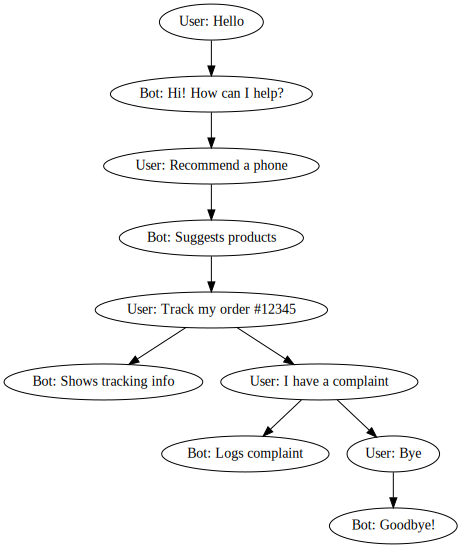

In [11]:
from graphviz import Digraph

# Initialize conversation flow diagram
dot = Digraph(comment="Chatbot Conversation Flow")

# Define nodes
dot.node("A", "User: Hello")
dot.node("B", "Bot: Hi! How can I help?")
dot.node("C", "User: Recommend a phone")
dot.node("D", "Bot: Suggests products")
dot.node("E", "User: Track my order #12345")
dot.node("F", "Bot: Shows tracking info")
dot.node("G", "User: I have a complaint")
dot.node("H", "Bot: Logs complaint")
dot.node("I", "User: Bye")
dot.node("J", "Bot: Goodbye!")

# Define edges
dot.edges(["AB", "BC", "CD", "DE", "EF", "EG", "GH", "GI", "IJ"])

# Display
dot.render(format='png')
dot


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

# Sample product catalog
product_catalog = [
    "Apple iPhone 14",
    "Samsung Galaxy S23",
    "Dell XPS 13 Laptop",
    "Nike Running Shoes",
    "Adidas Sneakers",
    "Lenovo Yoga Tablet",
    "Sony WH-1000XM5 Headphones"
]

# User query
user_query = "Suggest some shoes for running"

# Vectorize
vectorizer = TfidfVectorizer()
product_vectors = vectorizer.fit_transform(product_catalog + [user_query])

# Compute cosine similarity (last vector is the query)
similarity_scores = cosine_similarity(product_vectors[-1], product_vectors[:-1])

# Get top recommendation
top_index = similarity_scores.argsort()[0][-1]
recommended = product_catalog[top_index]

print("🗨️ User Query:", user_query)
print("🎯 Recommended Product:", recommended)


🗨️ User Query: Suggest some shoes for running
🎯 Recommended Product: Nike Running Shoes


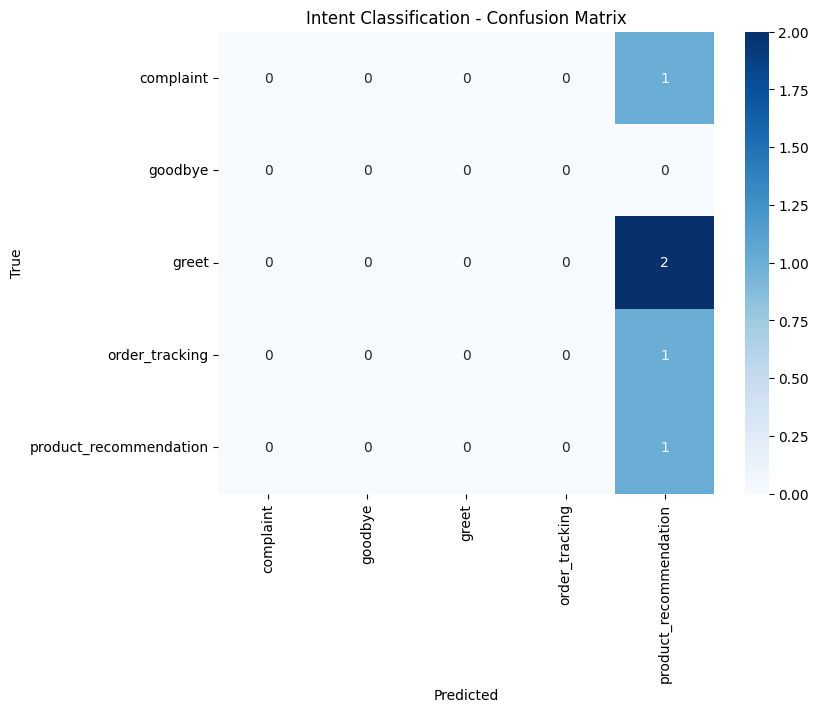

In [14]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=intent_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=intent_model.classes_, yticklabels=intent_model.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Intent Classification - Confusion Matrix')
plt.show()
